# PNG to Nifti conversion

## Requirements

- numpy

- os

- nibabel


In [1]:
import os
import numpy as np
import nibabel as nib   #Check that you have nibabel
import cv2     #opencv-python
from PIL import Image
#import shutil

In [98]:
print(os.getcwd())
BASE = os.getcwd()
IMG_FILENAME = 'rt1.nii'
IMG_PATH = os.path.join(BASE, IMG_FILENAME)
img = nib.load(IMG_PATH)
header = img.header
print(img.shape)
#print(img.header)
IMG_DATA =  img.get_fdata()


/Users/rasmus.siljander/jpg2nii/mri-modality-conversion
(200, 267, 264)


In [79]:
print(img.__dict__.keys())

dict_keys(['_header', 'extra', 'file_map', '_dataobj', '_fdata_cache', '_data_cache', '_affine', '_load_cache'])


In [80]:
img.file_map

{'image': <nibabel.fileholders.FileHolder at 0x7fb6abbd0a00>}

In [81]:
img._dataobj

In [82]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 54
dim             : [  3 200 267 264   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        0.9998832 0.9998832 0.9998832 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 175
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 792
glmin           : 0
descrip         : b'MPRAGE sag (MGH-variant)'
aux_file        : b''
qform_code      : unknown
sform_code      : scanner
quatern_b       : -0.50384474
quatern_c       : 0.4765191
quatern_d       : -0.49511412
qoffset_x       : -1

In [83]:
TEST_NII = nib.Nifti1Image(IMG_DATA, affine=img.affine, header=img.header)

In [84]:
nib.save(TEST_NII, 'test_nii.nii')

Text(0.5, 0.98, 'Center slices for EPI image')

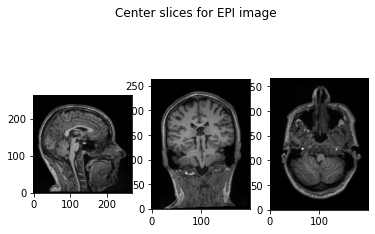

In [85]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = IMG_DATA[100, :, :]
slice_1 = IMG_DATA[:, 100, :]
slice_2 = IMG_DATA[:, :, 100]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

Text(0.5, 0.98, 'Center slices for EPI image')

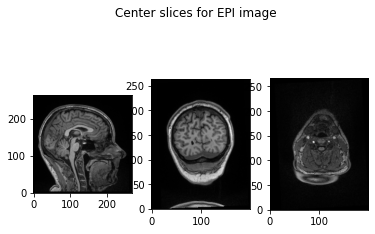

In [86]:
test_data = nib.load('test_nii.nii')._dataobj

slice_0 = test_data[100, :, :]
slice_1 = test_data[:, 50, :]
slice_2 = test_data[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

In [87]:
print(IMG_DATA.shape)
print(os.getcwd())
test_png = Image.open(BASE + '/png-imgs/rt1_z001.png')
print(test_png.size)
test_arr = np.asarray(test_png)
print(test_arr.shape)
test_arr = np.expand_dims(test_arr, 2)
print(test_arr.shape)


test_2 = Image.open(BASE + '/png-imgs/rt1_z002.png')
test_2 = np.expand_dims(np.asarray(test_2),2)
print(test_2.shape)

conc = np.concatenate((test_arr, test_2), axis = 2)
conc.shape


(200, 267, 264)
/Users/rasmus.siljander/jpg2nii/mri-modality-conversion
(267, 200)
(200, 267)
(200, 267, 1)
(200, 267, 1)


(200, 267, 2)

In [88]:
imgs = os.listdir('png-imgs')
print(sorted(imgs)[:4])

['rt1_z001.png', 'rt1_z002.png', 'rt1_z003.png', 'rt1_z004.png']


In [89]:
full_arr = np.empty((200,267,1))
print(full_arr.shape)
#empty = empty[:,:,1:]
#print(empty.shape)

imgs = os.listdir('png-imgs')
print(len(imgs))

img_base = f'{BASE}/png-imgs'

open_img = Image.open
for img_name in sorted(imgs):
    img_png = open_img(f'{img_base}/{img_name}')
    img_arr = np.expand_dims(np.asarray(img_png), 2)
    full_arr = np.concatenate((full_arr, img_arr), axis = 2)

full_arr = full_arr[:,:,1:]
print(full_arr.shape)
    

(200, 267, 1)
264
(200, 267, 264)


[[   0.99988317    0.            0.         -101.        ]
 [   0.            0.99988317    0.         -141.        ]
 [   0.            0.            0.99988317 -144.        ]
 [   0.            0.            0.            1.        ]]
(4, 4)
[0. 0. 0. 1.]
[[   0.99988317    0.            0.         -100.        ]
 [   0.            0.99988317    0.         -100.        ]
 [   0.            0.            0.99988317 -100.        ]
 [   0.            0.            0.         -100.        ]]


Text(0.5, 0.98, 'Center slices for EPI image')

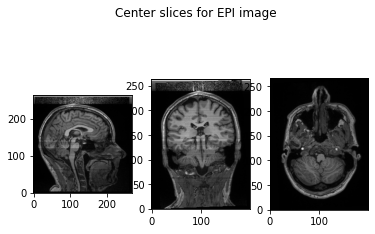

In [101]:
print(img.affine)

affine = img.affine.copy()
#print(affine.shape)
#print(affine[-1])
affine[:, -1] = -100 
#print(affine)
img_nii = nib.Nifti1Image(full_arr, affine = affine)
nib.save(img_nii, 'test_nii.nii')
test_data = nib.load('test_nii.nii').get_fdata()



slice_0 = test_data[100, :, :]
slice_1 = test_data[:, 100, :]
slice_2 = test_data[:, :, 100]
show_slices([slice_0, slice_1, slice_2])
#show_slices([test_data[:, :, 10], test_data[:, :, 15], test_data[:, :, 20]])

plt.suptitle("Center slices for EPI image") 

In [43]:
#test_data[16,:,:].shape
test_data[100,:,:]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [25]:
img.affine

array([[   0.99988317,    0.        ,    0.        , -101.        ],
       [   0.        ,    0.99988317,    0.        , -141.        ],
       [   0.        ,    0.        ,    0.99988317, -144.        ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [34]:
img.dataobj[100,100,5]

102.99147

In [35]:
test_data[16, : , :].shape

(267, 264)